# Análisis del Conjunto de Datos de Precios de Aguacate

**Conjunto de Datos de Precios de Aguacate**: El conjunto de datos "Precios de Aguacate", obtenido de Kaggle, es un conjunto de datos ampliamente utilizado para proyectos de análisis de datos y aprendizaje automático. Proporciona datos históricos sobre precios y ventas de aguacates en varias regiones de los Estados Unidos. Este conjunto de datos es valioso para entender las tendencias en los precios de los aguacates, los volúmenes de ventas y su relación con diferentes factores.

## Atributos Clave

- **Columnas**: El conjunto de datos incluye varias columnas de información. Algunas de las columnas clave típicamente encontradas en este conjunto de datos incluyen:
    - **Fecha** (`Date`): La fecha de observación.
    - **Precio Promedio** (`AveragePrice`): El precio promedio de los aguacates.
    - **Volumen Total** (`Total Volume`): El volumen total de aguacates vendidos.
    - **4046**: Volumen de aguacates Hass pequeños vendidos.
    - **4225**: Volumen de aguacates Hass grandes vendidos.
    - **4770**: Volumen de aguacates Hass extra grandes vendidos.
    - **Bolsas Totales** (`Total Bags`): Total de bolsas de aguacates vendidas.
    - **Bolsas Pequeñas** (`Small Bags`): Bolsas de aguacates pequeños vendidas.
    - **Bolsas Grandes** (`Large Bags`): Bolsas de aguacates grandes vendidas.
    - **Bolsas Extra Grandes** (`XLarge Bags`): Bolsas de aguacates extra grandes vendidas.
    - **Tipo** (`Type`): El tipo de aguacates, generalmente categorizados como convencionales u orgánicos.
    - **Región** (`Region`): La región o ciudad dentro de los Estados Unidos donde se registraron los datos.

- **Rango de Fechas**: El conjunto de datos abarca un rango de fechas, lo que permite el análisis de series de tiempo. Puedes examinar cómo cambian los precios y ventas de aguacates a lo largo de diferentes estaciones y años.

- **Regiones**: Se proporciona información para varias regiones o ciudades a través de los Estados Unidos, lo que permite el análisis de variaciones de precios y ventas en diferentes mercados.

- **Tipos**: El conjunto de datos distingue entre diferentes tipos de aguacates, como convencionales y orgánicos, lo que puede ser útil para comparar tendencias de precios entre estas categorías.

- **Volumen**: Están disponibles datos sobre el volumen total de aguacates vendidos. Esta métrica de volumen se utiliza a menudo para analizar la demanda del mercado.

- **Precio Promedio**: El conjunto de datos contiene el precio promedio de los aguacates, una métrica fundamental para entender las tendencias de precios.

## Casos de Uso

- Este conjunto de datos se utiliza comúnmente para aprender y practicar el análisis de datos, visualización de datos y modelado de regresión en proyectos de ciencia de datos y aprendizaje automático.

- Sirve como un recurso valioso para entender cómo trabajar con datos del mundo real, extraer conocimientos y tomar decisiones basadas en datos.

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import avocado_manager as av
av.init(); av.help(); av.info()
display(av.df("df_type"))
df_sorted = av.sort("df_date_price_volume", ["Date","region"], asc=[False, True])
display(df_sorted)

df_cp = av.df("df_cp")
df_cp_cleaned = df_cp
df_cp_cleaned['Suma Volums'] = df_cp_cleaned['Volume_Hass_S' ]+ df_cp_cleaned['Volume_Hass_L']+ df_cp_cleaned['Volume_Hass_XL' ]
df_cp_cleaned['%Variacio'] = (df_cp_cleaned['Total Volume'] - df_cp_cleaned['Suma Volums'])*100/df_cp_cleaned['Total Volume']
av.add(df_cp_cleaned,'df_cleaned')
display(av.df("df_cleaned"))

Ajuda:
    import avocado_manager as av
    av.Init()
    av.Init("avocado.csv")
    av.info()
    av.df("df")
    df_sorted = av.sort("df_date_price_volume", ["Date","region"], asc=[False, True])
    display(av.df("df_cp"))
    av.add(df,"df_name")
    
Lista de dataframes: ['df', 'df_cp', 'df_type', 'regions', 'years', 'dates', 'df_date_price_volume', 'df_cp_cleaned', 'df_city', 'df_region', 'df_city_region', 'df_greater', 'df_totalUS', 'region_largest']


,type,Total Volume
0,conventional,9126
1,organic,9123


,index,Date,region,AveragePrice,Total Volume,Season
8478,8478,2018-03-25,Albany,1.57,149396.50,1.Primavera
17601,17601,2018-03-25,Albany,1.71,2321.82,1.Primavera
8490,8490,2018-03-25,Atlanta,1.04,624645.42,1.Primavera
17613,17613,2018-03-25,Atlanta,1.56,18717.08,1.Primavera
8502,8502,2018-03-25,BaltimoreWashington,1.23,986038.75,1.Primavera
...,...,...,...,...,...,...
11829,11829,2015-01-04,TotalUS,1.46,612910.15,4.Invierno
2755,2755,2015-01-04,West,0.89,5794410.58,4.Invierno
11881,11881,2015-01-04,West,1.40,187548.30,4.Invierno
2807,2807,2015-01-04,WestTexNewMexico,0.75,758118.95,4.Invierno


,index,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_class,Suma Volums,%Variacio
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,City,55539.75,13.538804
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,City,45371.42,17.321580
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,City,110074.87,6.889980
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,City,73180.99,7.356630
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,City,44855.65,12.115984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Region,3576.16,79.055955
18245,18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Region,4623.20,66.710925
18246,18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Region,4372.65,68.237625
18247,18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Region,5235.68,67.691398


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import avocado_manager as av
av.init();av.info()
#display(pd.unique(av.df("df_cp")['region']))
#df = av.df("df_cp");df.info()
#display(av.df("df_type"))
display(av.df("df_city").groupby(["region"])["Total Volume"].sum().reset_index().sort_values("Total Volume"))
display(av.df("df_region").groupby(["region"])["Total Volume"].sum().reset_index().sort_values("Total Volume"))

display(av.df("df_city_region").groupby(["region"])["Total Volume"].sum().reset_index().sort_values("Total Volume"))

display(av.df("df_greater").groupby(["region"])["Total Volume"].sum().reset_index().sort_values("Total Volume"))
#df_sort = av.sort("df_cp_greater","region"); display(df_sort)
#display(av.df("df_cp_totalUS")) #.unique("region"))
df_largest = av.df("region_largest")
display(df_largest)

Lista de dataframes: ['df', 'df_cp', 'df_type', 'regions', 'years', 'dates', 'df_date_price_volume', 'df_cp_cleaned', 'df_city', 'df_region', 'df_city_region', 'df_greater', 'df_totalUS', 'region_largest', 'df_cleaned']


,region,Total Volume
29,Syracuse,1.094267e+07
2,Boise,1.441319e+07
27,Spokane,1.556528e+07
0,Albany,1.606780e+07
15,Louisville,1.609700e+07
20,Pittsburgh,1.880635e+07
22,Roanoke,2.504201e+07
12,Jacksonville,2.879000e+07
6,Columbus,2.999336e+07
9,GrandRapids,3.021174e+07


,region,Total Volume
1,BuffaloRochester,2.296247e+07
4,HarrisburgScranton,4.180886e+07
11,RichmondNorfolk,4.223085e+07
2,CincinnatiDayton,4.452201e+07
7,NewOrleansMobile,4.569514e+07
10,RaleighGreensboro,4.820273e+07
5,HartfordSpringfield,5.067054e+07
12,SouthCarolina,6.075377e+07
8,NorthernNewEngland,7.153289e+07
6,MiamiFtLauderdale,9.767322e+07


,region,Total Volume
42,Syracuse,1.094267e+07
3,Boise,1.441319e+07
40,Spokane,1.556528e+07
0,Albany,1.606780e+07
21,Louisville,1.609700e+07
30,Pittsburgh,1.880635e+07
5,BuffaloRochester,2.296247e+07
34,Roanoke,2.504201e+07
18,Jacksonville,2.879000e+07
9,Columbus,2.999336e+07


,region,Total Volume
4,Plains,3.111885e+08
2,Midsouth,5.083494e+08
1,GreatLakes,5.896425e+08
6,Southeast,6.152384e+08
3,Northeast,7.132809e+08
5,SouthCentral,1.011280e+09
0,California,1.028982e+09
7,West,1.086779e+09


Index(['TotalUS', 'West', 'California', 'SouthCentral', 'Northeast',
       'Southeast', 'GreatLakes', 'Midsouth', 'LosAngeles', 'Plains'],
      dtype='object', name='region')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import avocado_manager as av
av.init()

# Utiliza info() para revisar la estructura y los tipos de datos del conjunto.
df = av.df("df")
df.info()

# Realiza un análisis exploratorio para entender la estructura del conjunto, incluyendo 
# el número de filas y columnas, tipos de datos y valores faltantes. 
# Imprime la cantidad de valores faltantes por columna utilizando isnull().

#Forma del DataFrame (filas, columnas)
data_shape = df.shape
print(f"Forma del DataFrame: {data_shape}")

column_names = df.columns
print(f"Nombres de Columnas: {column_names}")

# Tipos de datos de cada columna
data_types = df.dtypes
print(f"Tipos de Datos:\n{data_types}")

#df.isnull
#missing_values = pd.isnull(df)
print(f"Cantidad de nulls: {df.isnull().sum()}")

# series de tiempo
df['Date'] = pd.to_datetime(df['Date'])
ventas_mensual = df.groupby(df['Date'].dt.to_period("M"))['Total Volume'].sum()
display(ventas_mensual)

# Resumen Estadístico
data_summary = df.describe()
print("\nResumen Estadístico:")
print(data_summary)

df.head(5)
#df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
Forma del DataFrame: (18249, 14)
Nombres de Columnas: Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '47

Date
2015-01    3.180852e+08
2015-02    3.626376e+08
2015-03    4.185831e+08
2015-04    3.441444e+08
2015-05    4.837840e+08
2015-06    3.818267e+08
2015-07    3.567019e+08
2015-08    4.192448e+08
2015-09    3.292188e+08
2015-10    3.057761e+08
2015-11    3.694400e+08
2015-12    2.960259e+08
2016-01    4.754058e+08
2016-02    4.286458e+08
2016-03    3.912124e+08
2016-04    4.018328e+08
2016-05    5.612305e+08
2016-06    4.103282e+08
2016-07    4.672753e+08
2016-08    3.707970e+08
2016-09    3.623033e+08
2016-10    3.602018e+08
2016-11    2.602093e+08
2016-12    3.314478e+08
2017-01    5.333330e+08
2017-02    4.714672e+08
2017-03    3.589034e+08
2017-04    4.898145e+08
2017-05    4.257305e+08
2017-06    4.104107e+08
2017-07    4.749037e+08
2017-08    3.383330e+08
2017-09    2.847795e+08
2017-10    3.627780e+08
2017-11    3.245193e+08
2017-12    4.593329e+08
2018-01    4.297071e+08
2018-02    4.977782e+08
2018-03    4.552531e+08
Freq: M, Name: Total Volume, dtype: float64


Resumen Estadístico:
         Unnamed: 0                           Date  AveragePrice  \
count  18249.000000                          18249  18249.000000   
mean      24.232232  2016-08-13 23:30:43.498273792      1.405978   
min        0.000000            2015-01-04 00:00:00      0.440000   
25%       10.000000            2015-10-25 00:00:00      1.100000   
50%       24.000000            2016-08-14 00:00:00      1.370000   
75%       38.000000            2017-06-04 00:00:00      1.660000   
max       52.000000            2018-03-25 00:00:00      3.250000   
std       15.481045                            NaN      0.402677   

       Total Volume          4046          4225          4770    Total Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean   8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04  2.396392e+05   
min    8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.083858e+04  8.540700e+02  3.008780e+03  

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


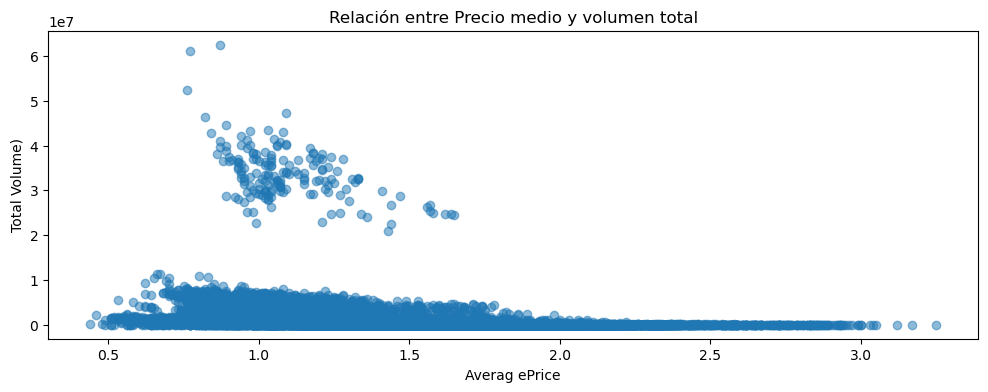

,index,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region_class
region,,,,,,,,,,,,,,
Albany,338,338,338,338,338,338,338,338,338,338,338,338,338,338
Atlanta,338,338,338,338,338,338,338,338,338,338,338,338,338,338
BaltimoreWashington,338,338,338,338,338,338,338,338,338,338,338,338,338,338
Boise,338,338,338,338,338,338,338,338,338,338,338,338,338,338
Boston,338,338,338,338,338,338,338,338,338,338,338,338,338,338
BuffaloRochester,338,338,338,338,338,338,338,338,338,338,338,338,338,338
California,338,338,338,338,338,338,338,338,338,338,338,338,338,338
Charlotte,338,338,338,338,338,338,338,338,338,338,338,338,338,338
Chicago,338,338,338,338,338,338,338,338,338,338,338,338,338,338


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import avocado_manager as av
av.init()
df = av.df("df_cp")
#df["Date"]
#df.groupby(by=["region"]).count().count()
#df["Date"]
#df.index = df['Date']
#df.index = pd.to_datetime(df['Date']) #,format='%y-%m-%y')
#df.groupby(by=[df.index.year, df.index.month, df.index.day]).count()
plt.figure(figsize=(12, 4))
plt.scatter(df['AveragePrice'], df['Total Volume'], alpha=0.5)
plt.xlabel('Averag ePrice')
plt.ylabel('Total Volume)')
plt.title('Relación entre Precio medio y volumen total')
plt.show()

df.groupby(by=['region']).count()

Lista de dataframes: ['df', 'df_cp', 'df_type', 'regions', 'years', 'dates', 'df_date_price_volume', 'df_cp_cleaned', 'df_city', 'df_region', 'df_city_region', 'df_greater', 'df_totalUS', 'region_largest', 'df_cleaned']


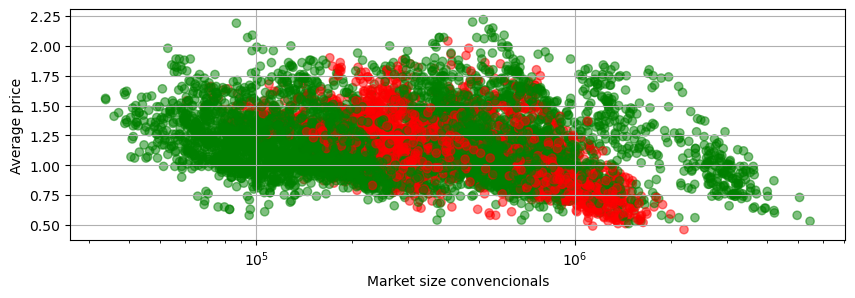

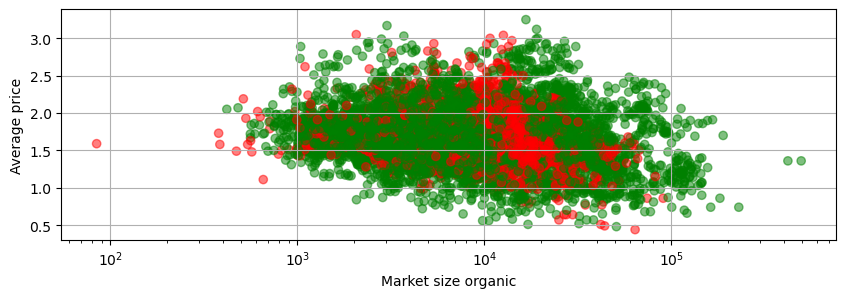

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import avocado_manager as av
av.init();av.info()
# Claramente hay sitios donde los aguacates son más baratos, miremos si tiene que ver con otras características
classification_colors = {'City':'green' ,'Region':'red' ,'GreaterRegion':'orange', 'TotalUS': 'blue'}

df_subset = av.df("df_city_region") # df_cp[df_cp['region']!= 'TotalUS']
df_organic = df_subset[df_subset['type']=='organic']
df_convencionals = df_subset[df_subset['type']=='conventional']

fig, ax= plt.subplots(figsize=(10,3))
x_values = df_convencionals['Total Volume']
y_values = df_convencionals['AveragePrice']
c_values= list(df_convencionals['region_class'].map(classification_colors))
plt.scatter(x= x_values, y= y_values, c=c_values, alpha = .5)
plt.xscale('log')
plt.ylabel('Average price')
plt.xlabel('Market size convencionals')
plt.grid()

fig, ax= plt.subplots(figsize=(10,3))
x_values = df_organic['Total Volume']
y_values = df_organic['AveragePrice']
c_values= list(df_organic['region_class'].map(classification_colors))
plt.scatter(x= x_values, y= y_values, c=c_values, alpha = .5)
plt.xscale('log')
plt.ylabel('Average price')
plt.xlabel('Market size organic')
plt.grid()

In [ ]:
# 8. Recomendaciones: Basado en tus hallazgos, proporciona recomendaciones prácticas a la cadena de tiendas de comestibles. 
# Esto puede incluir estrategias de precios, enfoques de marketing y análisis de tendencias estacionales.

# Muestreo de una fracción aleatoria (20%) de filas del DataFrame
df.sample(frac=0.2)

,index,Date,AveragePrice,Total Volume,Volume_Hass_S,Volume_Hass_L,Volume_Hass_XL,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,region_class
1004,1004,2015-09-06,1.11,156608.28,3361.77,92568.64,16662.01,44015.86,25163.49,15845.63,3006.74,conventional,2015,Indianapolis,City
1082,1082,2015-03-08,1.24,112487.20,77300.18,8997.99,745.39,25443.64,19549.59,5894.05,0.00,conventional,2015,Jacksonville,City
122,122,2015-08-23,1.16,783935.36,59242.02,499100.39,47216.18,178376.77,175047.15,3060.44,269.18,conventional,2015,BaltimoreWashington,Region
13032,13032,2016-11-06,1.94,6815.62,1815.17,3164.88,0.00,1835.57,1827.56,8.01,0.00,organic,2016,LasVegas,City
13949,13949,2016-03-20,1.00,8346.57,308.39,2675.89,164.39,5197.90,1653.33,3544.57,0.00,organic,2016,RichmondNorfolk,Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,2325,2015-04-12,1.05,356627.38,220208.81,49060.02,16838.53,70520.02,57990.96,12529.06,0.00,conventional,2015,SouthCarolina,State
2389,2389,2015-01-18,0.79,5322625.57,2839359.92,1782045.18,146481.44,554739.03,497106.16,57607.18,25.69,conventional,2015,SouthCentral,GreaterRegion
1544,1544,2015-04-19,1.31,3786141.18,110954.74,2552885.19,6389.90,1115911.35,984678.78,131232.57,0.00,conventional,2015,Northeast,GreaterRegion
12972,12972,2016-01-03,1.53,2057.45,229.67,1187.16,0.00,640.62,304.07,336.55,0.00,organic,2016,Indianapolis,City


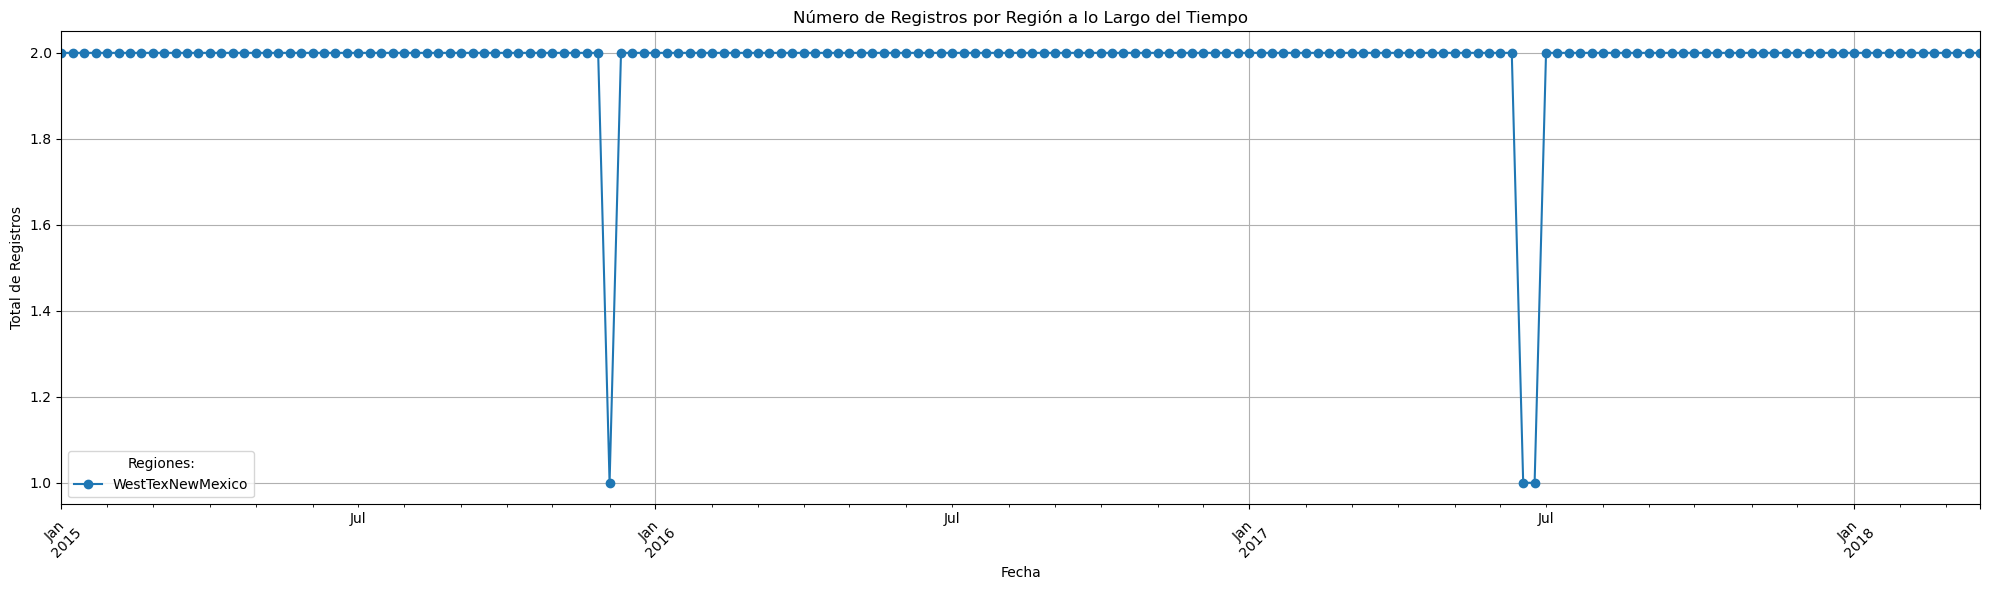

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import avocado_manager as av
av.init()
df_cp = av.df("df_cp")

df_count = df_cp.groupby(['Date', 'region']).size().reset_index(name='Total')
df_pivot = df_count.pivot(index='Date', columns='region', values='Total').fillna(0)
diferencias = df_pivot.apply(lambda x: x.nunique() > 1, axis=0)

regiones_con_diferencias = diferencias[diferencias].index.tolist()
df_pivot[regiones_con_diferencias].plot(kind='line', marker='o',figsize=(20, 6))
plt.title('Número de Registros por Región a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total de Registros')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Regiones:')
plt.tight_layout()
plt.show()

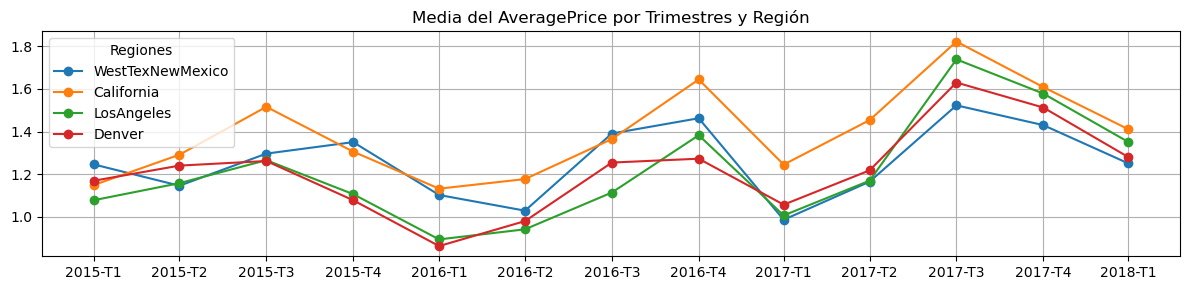

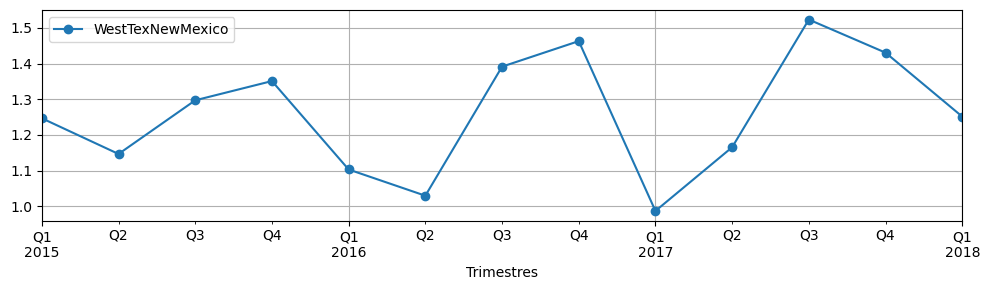

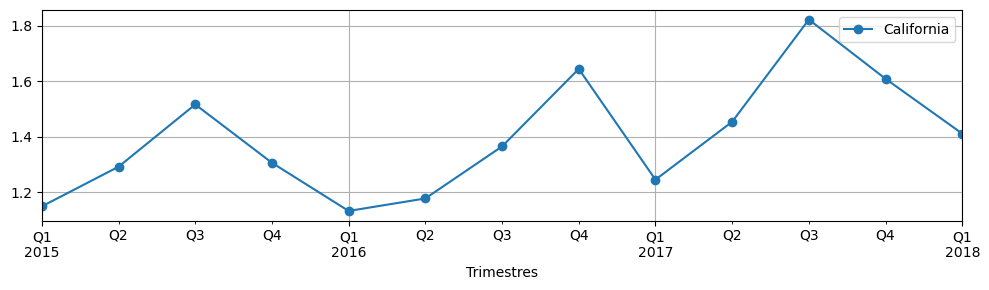

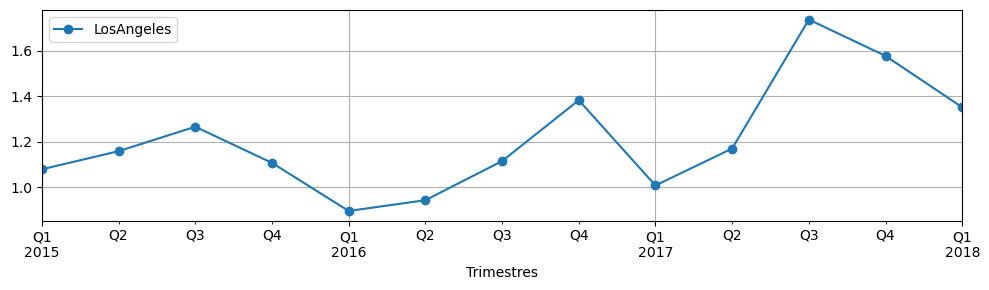

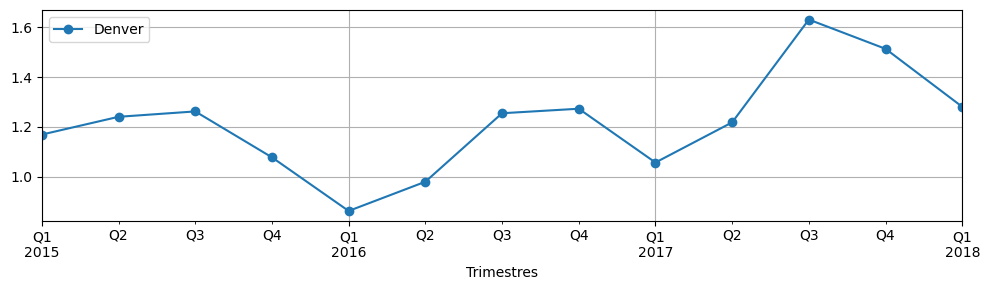

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import avocado_manager as av
av.init()
df_cp = av.df("df_cp")

#lstRegions = df_cp['region'].unique()
lstRegions = ['WestTexNewMexico','California','LosAngeles', 'Denver']
df_media = df_cp.groupby([pd.Grouper(key='Date', freq='Q'), 'region'])['AveragePrice'].mean().reset_index()

plt.figure( figsize=(12, 3))
for region in lstRegions:
    datos_region = df_media[df_media['region'] == region]    
    plt.plot(datos_region['Date'], datos_region['AveragePrice'], marker='o', label=region)
plt.title('Media del AveragePrice por Trimestres y Región')
trimestres = [f"{d.year}-T{(d.quarter)}" for d in df_media['Date'].unique()]
plt.xticks(df_media['Date'].unique(), trimestres, rotation=0)
plt.legend(loc='best', title='Regiones')
plt.grid(True) #plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

for region in lstRegions:     
    df_media_plt = df_media[df_media['region'] == region]
    df_media_plt.plot(x='Date', y='AveragePrice', marker='o', label=region, figsize=(10, 3)) # title=f"Precio Medio {region}"
    #plt.plot(df_media_plt['Date'], df_media_plt['AveragePrice'],  marker='o', label=region)
    plt.legend(loc='best');
    plt.xlabel('Trimestres')
    plt.grid(True); # plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Notas

#### Nota:
`seasonal_decompose` es una función de la biblioteca `statsmodels` que se utiliza para descomponer una serie temporal en sus componentes principales: tendencia, estacionalidad y residuos. En esencia, busca separar las diferentes componentes que influyen en los datos a lo largo del tiempo.

**Componentes de la descomposición:**

* **Tendencia (Trend):** Representa la variación a largo plazo de la serie.  Piensa en la dirección general que siguen los datos a través del tiempo. Puede ser ascendente, descendente o constante.
* **Estacionalidad (Seasonality):**  Se refiere a patrones que se repiten a intervalos regulares de tiempo. Por ejemplo, las ventas de helados tienden a aumentar en verano y disminuir en invierno, mostrando un patrón estacional anual.  El período de estacionalidad es la duración de este ciclo repetitivo (e.g., semanal, mensual, anual).
* **Residuos (Residuals):**  Representan la parte aleatoria o irregular de la serie, lo que no puede explicarse por la tendencia ni la estacionalidad.  Estos son los datos restantes después de eliminar la tendencia y la estacionalidad.  Un buen modelo de descomposición debería tener residuos que parezcan ruido blanco (sin patrones claros).

**Cómo funciona `seasonal_decompose`:**

La función toma una serie temporal como entrada y utiliza un modelo para separar los datos en sus componentes.  El modelo puede ser `'additive'` o `'multiplicative'`.

* **Modelo aditivo:**  Asume que los componentes se suman para formar la serie:  `Serie = Tendencia + Estacionalidad + Residuos`.  Este modelo es adecuado cuando la amplitud de la estacionalidad se mantiene relativamente constante a lo largo del tiempo.

* **Modelo multiplicativo:**  Asume que los componentes se multiplican: `Serie = Tendencia * Estacionalidad * Residuos`. Este modelo es apropiado cuando la amplitud de la estacionalidad aumenta o disminuye con la tendencia.

El parámetro `period` especifica la duración del ciclo estacional. Por ejemplo, si tus datos tienen un patrón semanal, el período sería 7.  Si es mensual, sería 12 para un patrón anual.  La elección correcta del período es crucial para la precisión de la descomposición.

#### Nota:

"Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido."


Se refiere a la visualización gráfica de los diferentes componentes de una serie de tiempo después de aplicar una descomposición para separar la serie temporal original (`df_grouped`) en las componentes:

a. **Tendencia (Trend):**  Muestra la dirección general a largo plazo de la serie.  Es la parte de la serie que cambia gradualmente a lo largo del tiempo.

b. **Estacionalidad (Seasonality):**  Representa patrones repetitivos que ocurren a intervalos regulares (semanales, mensuales, anuales, etc.). Por ejemplo, las ventas de helados tienden a ser más altas en verano.  En tu código, `period=7` sugiere una estacionalidad semanal.

c. **Residuos (Residuals):**  Es la parte de la serie que no se explica por la tendencia ni la estacionalidad.  Idealmente, los residuos deberían parecerse a ruido aleatorio.  Si hay patrones claros en los residuos, significa que el modelo de descomposición no ha capturado todos los aspectos importantes de la serie.


#### Nota:

The reason you need reset_index is because groupby creates a multi-index.

Seaborn's barplot (and other plotting functions) don't directly work with multi-indices.

Resetting the index makes 'Season' and 'region' regular columns, which are compatible.

#### Nota:
...

#### Nota:
...